In [11]:
import os
from pathlib import Path
from os.path import dirname, abspath
from shutil import copy2
import numpy as np
import PIL
from PIL import ImageEnhance
from PIL import Image, ImageOps
import cv2
import logging
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [12]:
print("~~~~~~~~~~~~")
print("   Train    ")
print("~~~~~~~~~~~~")
print("y_train_optotype: ", y_train_optotype)
print("y_train_angle: ", y_train_angle)

print("~~~~~~~~~~~~")
print("    Test    ")
print("~~~~~~~~~~~~")
print("y_test_optotype: ", y_test_optotype)
print("y_test_angle: ", np.unique(y_test_angle))

~~~~~~~~~~~~
   Train    
~~~~~~~~~~~~
y_train_optotype:  [0 'Z' 'Z' ... 'cow' 'cow' 'cow']
y_train_angle:  [ 0 90  0 ...  0  0 90]
~~~~~~~~~~~~
    Test    
~~~~~~~~~~~~
y_test_optotype:  [0 'Z' 'Z' ... 'cow' 'cow' 'cow']
y_test_angle:  [  0  45  90 135]


~~~~~~~~~~~~
Test Values 
~~~~~~~~~~~~
Index = 1745
Optotype = smile-line
Angle = 0
[[[0.68235294 0.80392157 0.97254902]
  [0.68627451 0.8        0.96862745]
  [0.68627451 0.8        0.96862745]
  ...
  [0.71764706 0.82352941 0.98431373]
  [0.71764706 0.82352941 0.98431373]
  [0.71372549 0.81960784 0.98039216]]

 [[0.68627451 0.80784314 0.97647059]
  [0.69019608 0.80392157 0.97254902]
  [0.69411765 0.80784314 0.97647059]
  ...
  [0.71764706 0.82352941 0.98431373]
  [0.71372549 0.81960784 0.98039216]
  [0.71764706 0.82352941 0.98431373]]

 [[0.67843137 0.8        0.96862745]
  [0.69411765 0.80784314 0.97647059]
  [0.68235294 0.79607843 0.96470588]
  ...
  [0.71372549 0.81960784 0.98039216]
  [0.71372549 0.81960784 0.98039216]
  [0.71372549 0.81960784 0.98039216]]

 ...

 [[0.52941176 0.64705882 0.85882353]
  [0.53333333 0.65098039 0.8627451 ]
  [0.53333333 0.65098039 0.8627451 ]
  ...
  [0.30588235 0.38039216 0.58039216]
  [0.29411765 0.36862745 0.56862745]
  [0.28627451 0.36078431 0.56

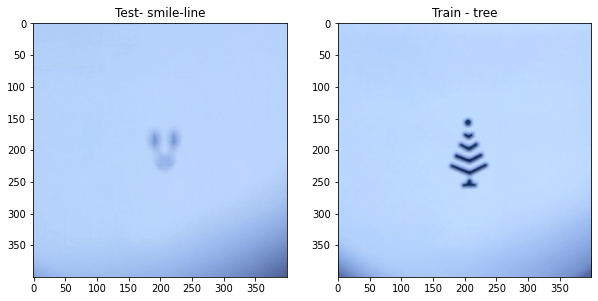

In [13]:
import matplotlib.pyplot as plt
def print_random_test_values(ax):
    index = np.random.randint(0, x_test.shape[0])
    print("~~~~~~~~~~~~")
    print("Test Values ")
    print("~~~~~~~~~~~~")

    print("Index = {x}".format(x=index))

    print("Optotype = {x}".format(x=y_test_optotype[index]))
    print("Angle = {x}".format(x=y_test_angle[index]))
    print(x_test[index])

    ax.set_title("Test- {x}".format(x=y_test_optotype[index]))
    ax.imshow(x_test[index])

def print_random_training_values(ax):
    index = np.random.randint(0, x_train.shape[0])
    print("~~~~~~~~~~~~")
    print("Train Values")
    print("~~~~~~~~~~~~")

    print("Index = {x}".format(x=index))

    print("Optotype = {x}".format(x=y_train_optotype[index]))
    print("Angle = {x}".format(x=y_train_angle[index]))
    print(x_test[index])

    ax.set_title("Train - {x}".format(x=y_train_optotype[index]))
    ax.imshow(x_train[index])

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
print_random_test_values(ax[0])
print_random_training_values(ax[1])

plt.show()

## Transfer learning

## RESNET50

In [6]:
from tensorflow import keras


TODO : Going to try this experiment with this guy https://github.com/EscVM/Efficient-CapsNet.

In [7]:
def testicle_test():
    y_train_angle = np.zeros(27, dtype=np.int)
    for i, sample_name in enumerate(low_distortion_filenames):
        thing = extract_angle(sample_name)
        y_train_angle[i] = thing
    print(np.unique(y_train_angle))

testicle_test()

[  0  45  90 135]


# Transfer learning with VGG16

### Create the model
- Make sure `model.trainable = False `
-

In [14]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_set = image_dataset_from_directory("/Users/brookeryan/Developer/BaldiLab/Visual-Acuity/images/training/",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(150, 150))
val_dataset = image_dataset_from_directory("/Users/brookeryan/Developer/BaldiLab/Visual-Acuity/images/testing/",
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(150, 150))

Found 1500 files belonging to 64 classes.
Found 3223 files belonging to 64 classes.


In [ ]:
def create_base_model():
    vgg = VGG16(include_top=False, weights="imagenet", input_shape=(h, w, 3))
    vgg.trainable = False
    return vgg

base_model = create_base_model()
x = base_model(x_train, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
inputs = keras.Input(shape=(h, w, 3))
outputs = keras.layers.Dense(1, activation=tf.keras.activations.softmax)(x)
model = keras.Model(inputs, outputs)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_set, epochs=20, validation_data=val_dataset)

In [8]:
import tensorflow as tf
from keras import  models
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
# !pip install pydot
# !pip install graphviz
# !pip install pydotplus

model = tf.keras.applications.VGG16()
# plot_model(model)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
from keras import  models

base_model = VGG16(weights='imagenet')
model_VGG16 = models.Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

model_VGG16.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model = VGG16(include_top=False, weights="imagenet", input_shape=(h, w, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [11]:
for layer in model.layers[:45]:
    layer.trainable = False
    print(layer)

In [12]:
import tensorflow.keras as K

def create_transfer_model_2():
    input_t = K.Input(shape=(h, w, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)

    for layer in res_model.layers[:45]:
        layer.trainable = False
    #to_res = (224, 224)
    model = K.models.Sequential()
    #model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res)))
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(4, activation='softmax')) #this

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

model = create_transfer_model_2()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 13, 13, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 346112)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 346112)            1384448   
_________________________________________________________________
dense (Dense)                (None, 256)               88604928  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3